1.Import the necessary libraries.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3.First look at its main features (head, shape, info).

In [6]:
data = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

print(data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


5.Change effective to date column to datetime format.

In [9]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


6.Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [10]:
numerical_df = data.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


7.Define a function that differentiates between continuous and discrete variables.

In [11]:
numerical_df.isnull().sum()/len(numerical_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [12]:
numerical_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [13]:
numerical_df['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [14]:
numerical_df['number_of_policies'].value_counts(dropna=False)

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [15]:
def separate_continuous_discrete_data(df):
    continuous_cols = []
    discrete_cols = []
    
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            if len(df[col].unique()) > 30:
                continuous_cols.append(col)
            else:
                discrete_cols.append(col)
        else:
            discrete_cols.append(col)
    
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    
    return continuous_df, discrete_df

In [16]:
# Separate the data into continuous and discrete variables
continuous_df, discrete_df = separate_continuous_discrete_data(numerical_df)

In [17]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'total_claim_amount'],
      dtype='object')

In [18]:
discrete_df.columns

Index(['number_of_open_complaints', 'number_of_policies'], dtype='object')

In [19]:
print("Continuous variables:")
print(continuous_df)
print("\nDiscrete variables:")
print(discrete_df)

Continuous variables:
      customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18

8.Plot a correlation matrix, comment what you see.

In [20]:
correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


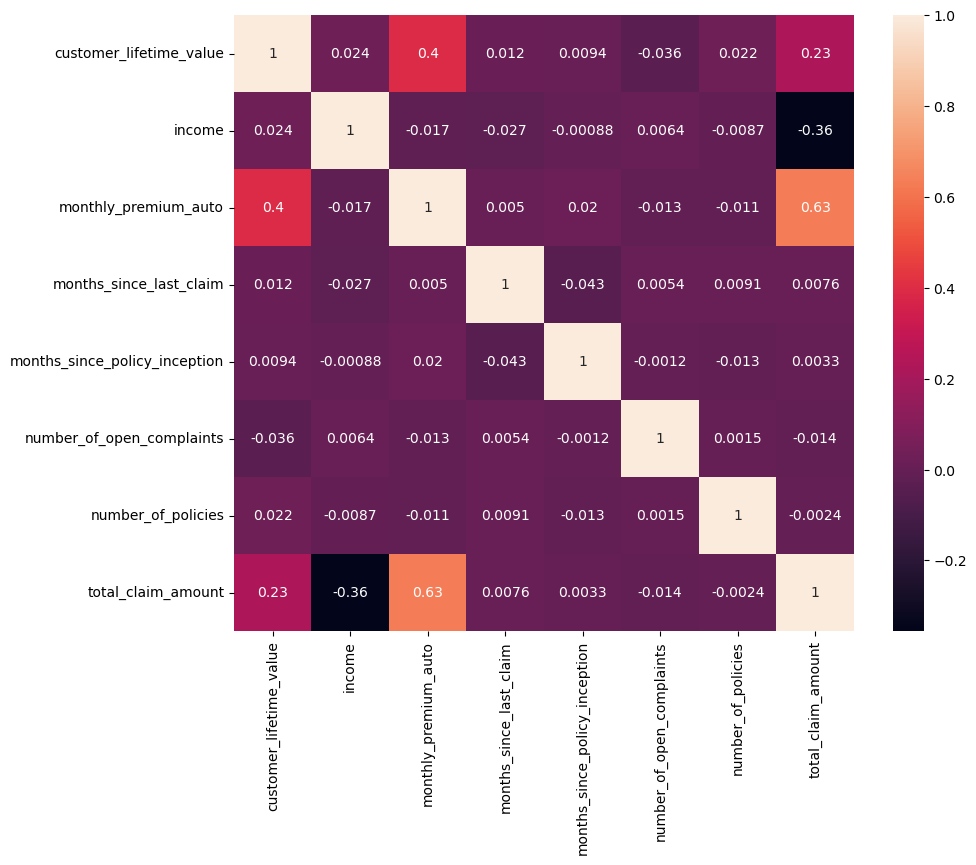

In [21]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [22]:
#the column 'total_claim_amount' and 'monthly_premium_auto' have made a collinearity with 0.63,  the others dosen't have good collinearity 

9.Create a function to plot every discrete variable. 

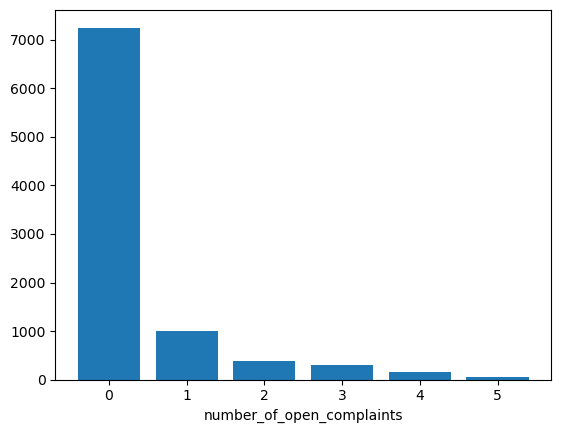

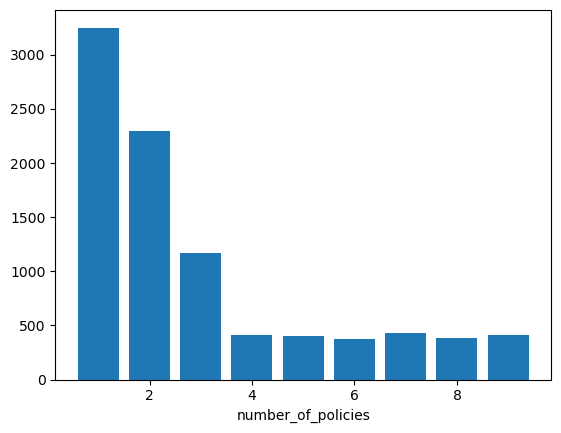

In [23]:
# Plot the discrete variables as bar plots
for col in discrete_df:
    plt.bar(data[col].value_counts().index, data[col].value_counts().values)
    plt.xlabel(col)
    plt.show()

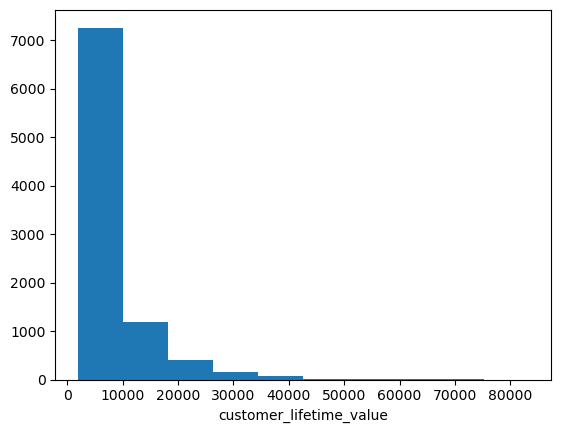

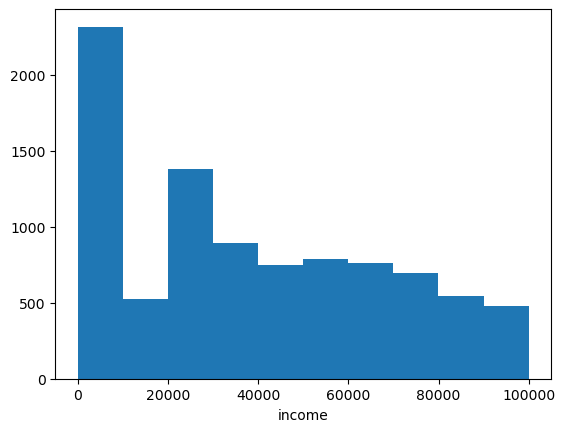

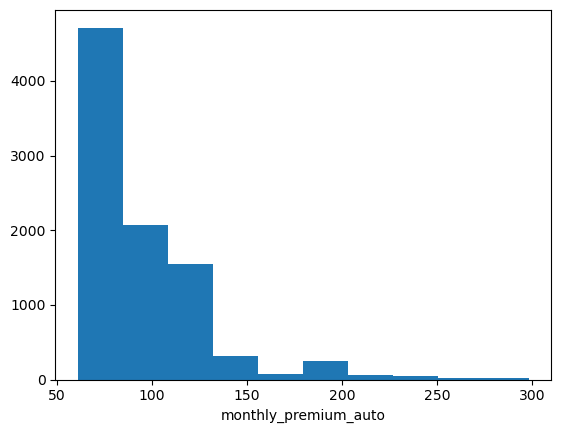

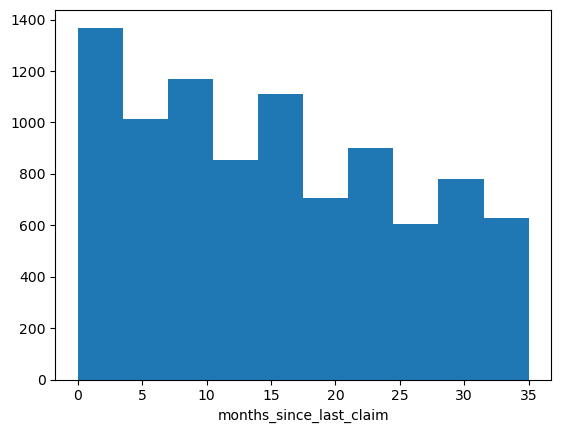

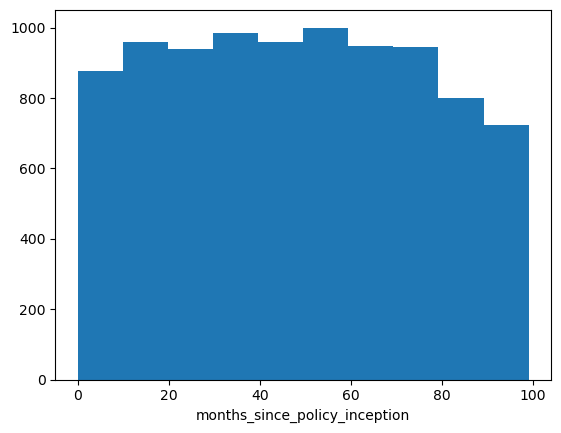

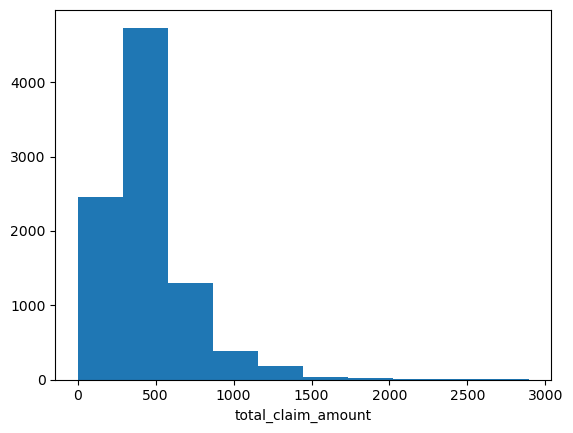

In [24]:
 # Plot the continuous variables as histograms

for col in continuous_df:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

In [25]:
# 1.Discrete variables have much less unique values, and most of them have the same value. most value from column'number_of_open_complaints' are 0.
# 2.The continuous variables have obviously a lot more unique values, the most of them are different.

11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

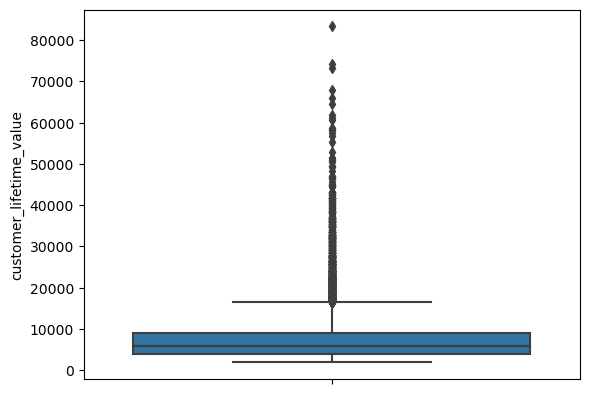

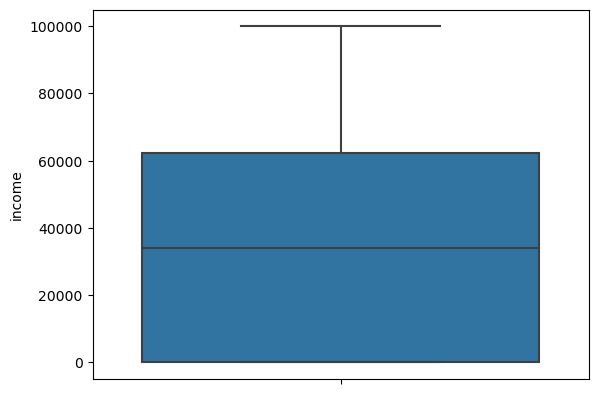

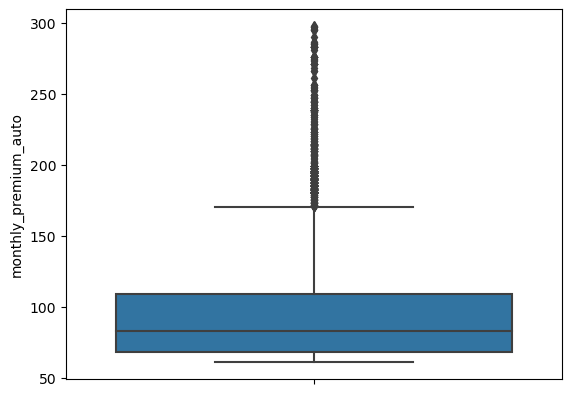

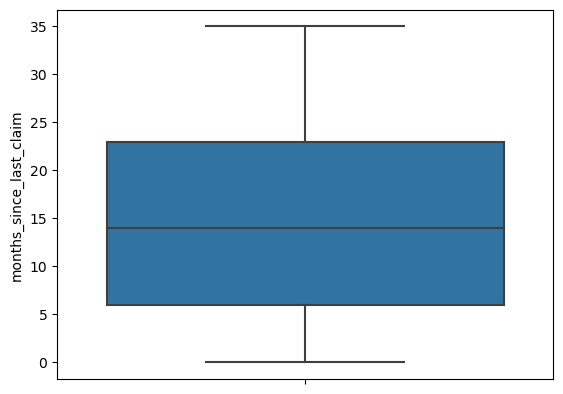

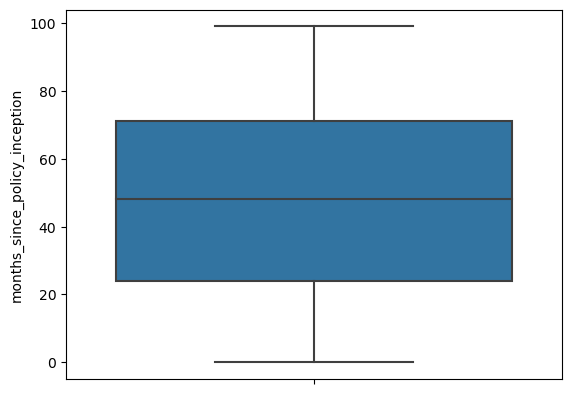

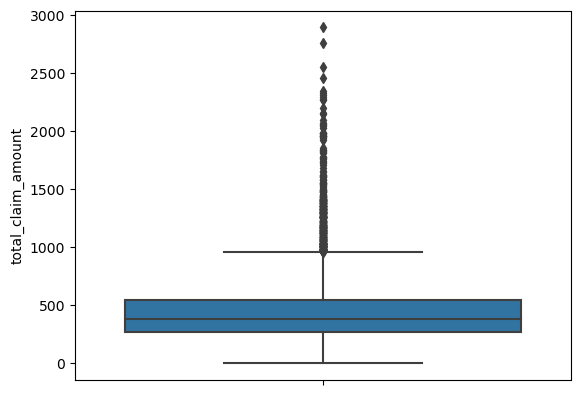

In [26]:
for col in continuous_df:
    sns.boxplot(y=data[col])
    plt.show()
   

12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

#### drop monthly_premium_auto

In [27]:
numerical_df['customer_lifetime_value'].nunique()

8041

In [28]:
numerical_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [29]:
numerical_df['customer_lifetime_value'].mean()

8004.9404749870755

In [30]:
numerical_df['customer_lifetime_value'].median()

5780.182197

In [31]:
np.percentile(numerical_df['customer_lifetime_value'],75)

8962.16704125

In [32]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(numerical_df['customer_lifetime_value'],75) - np.nanpercentile(numerical_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(numerical_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)


16414.039911750002


In [33]:
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value'] >upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed

817

In [34]:
# total has 9134 Rows
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value'] >65000]
len(extraordinary_points) 

5

In [35]:
# If we wanted to drop the rows that are above upper_limit
numerical_df = numerical_df[numerical_df['customer_lifetime_value'] <= 65000].copy()

In [36]:
len(numerical_df)

9129

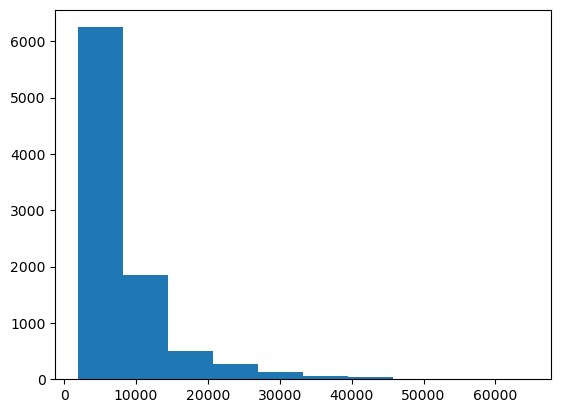

In [37]:
plt.hist(numerical_df['customer_lifetime_value'])
plt.show()

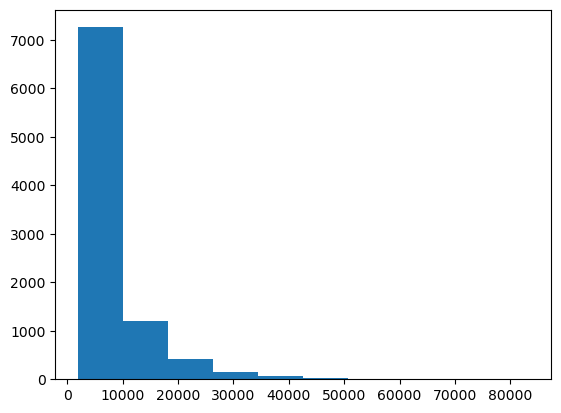

In [38]:
plt.hist(data['customer_lifetime_value'])
plt.show()

#### drop monthly_premium_auto

In [34]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(numerical_df['monthly_premium_auto'],75) - np.nanpercentile(numerical_df['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(numerical_df['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)


170.5


In [35]:
extraordinary_points = numerical_df[numerical_df['monthly_premium_auto'] >upper_limit]
len(extraordinary_points) 

406

In [36]:
numerical_df['monthly_premium_auto'].mean()

92.7593123209169

In [37]:
numerical_df = numerical_df[numerical_df['monthly_premium_auto'] <= upper_limit].copy()
len(numerical_df)

8668

#### drop total_claim_amount

In [38]:
iqr = np.nanpercentile(numerical_df['total_claim_amount'],75) - np.nanpercentile(numerical_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(numerical_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

927.2470455


In [39]:
extraordinary_points = numerical_df[numerical_df['total_claim_amount'] >upper_limit]
len(extraordinary_points) 

254

In [40]:
numerical_df = numerical_df[numerical_df['total_claim_amount'] <= upper_limit].copy()
len(numerical_df)

8414

13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [41]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

14.Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [42]:
numerical_df.to_csv('numerical.csv', index=False)